<a href="https://colab.research.google.com/github/nikita0517/Speech_emotion_recognition/blob/main/SER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

Male Neutral

In [59]:
# LOAD IN FILE
#x, sr = librosa.load('/content/speech-emotion-recognition-ravdess-data.zip/Actor_01/03-01-01-01-01-01-01.wav')
x, sr = librosa.load('/content/03-01-01-01-01-01-21.wav')


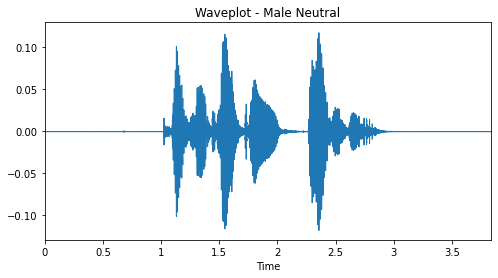

In [60]:
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

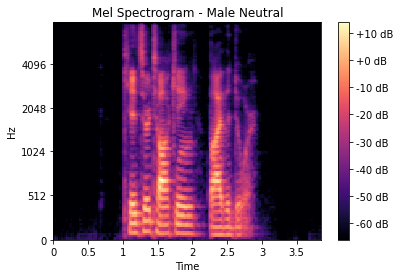

In [61]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

#NIKITA SIROHI 19SCSE1180028 SHIVANK 19SCSE1180027

Female Calm

In [ ]:
x, sr = librosa.load('/content/03-01-02-01-01-01-22.wav')

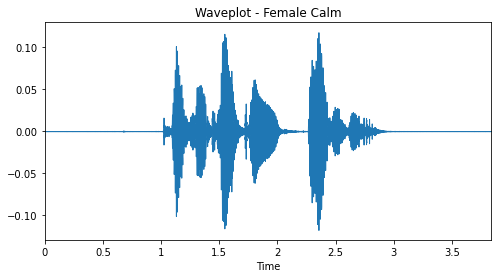

In [62]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')

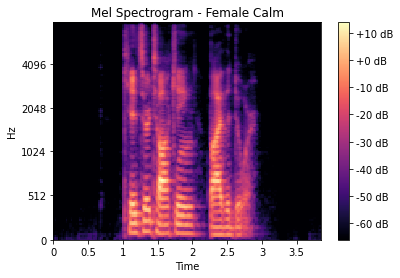

In [63]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB');
#NIKITA SIROHI 19SCSE1180028 SHIVANK 19SCSE1180027

Male Happy

In [72]:
# LOAD FILE
x, sr = librosa.load('/content/03-01-03-01-01-01-03.wav')

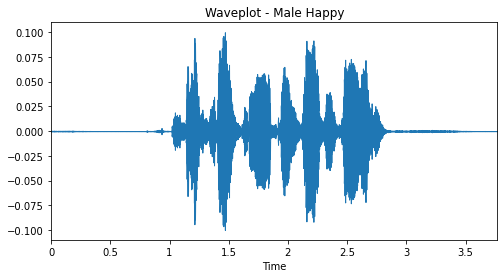

In [73]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')
plt.savefig('Waveplot_MaleHappy.png')

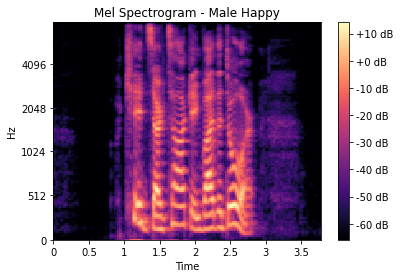

In [74]:
# CREATE LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.savefig('MelSpec_MaleHappy.png')
plt.colorbar(format='%+2.0f dB');
#NIKITA SIROHI 19SCSE1180028 SHIVANK 19SCSE1180027

Female Sad

In [75]:
# LOAD FILE
x, sr = librosa.load('/content/03-01-04-01-01-01-04.wav')

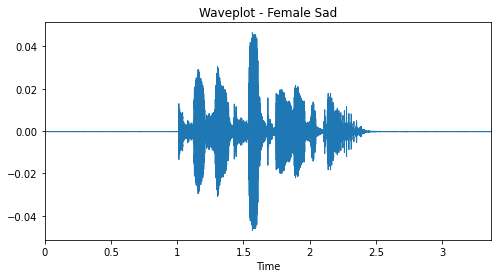

In [76]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Sad')
plt.savefig('Waveplot_FemaleSad.png')

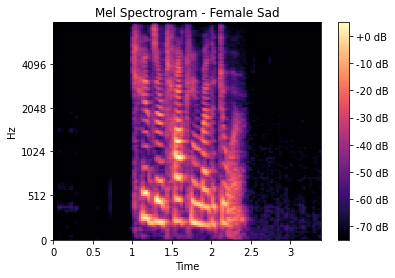

In [77]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Sad');
plt.savefig('MelSpec_FemaleSad.png')
plt.colorbar(format='%+2.0f dB');
#NIKITA SIROHI 19SCSE1180028 SHIVANK 19SCSE1180027

Male Angry

In [78]:
# LOAD FILE
x, sr = librosa.load('/content/03-01-05-01-01-01-05.wav')

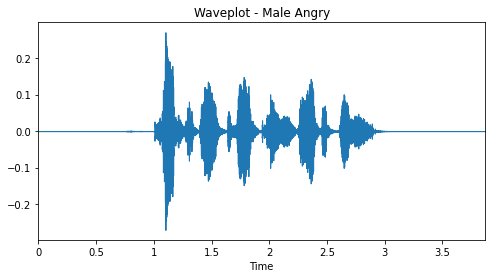

In [79]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')

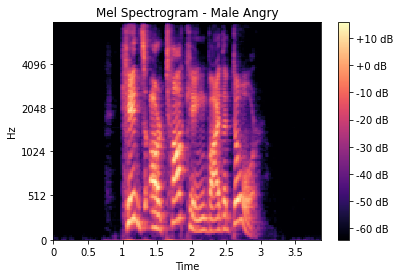

In [80]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB');
#NIKITA SIROHI 19SCSE1180028 SHIVANK 19SCSE1180027

Female Fearful

In [81]:
# LOAD FILE
x, sr = librosa.load('/content/03-01-06-01-01-01-06.wav')


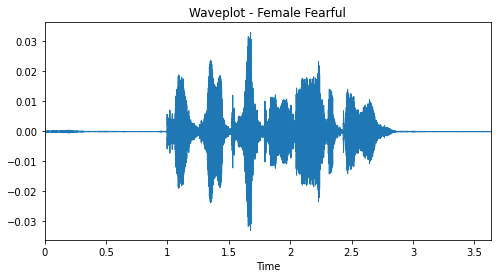

In [82]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')
plt.savefig('Waveplot_FemaleFearful.png')

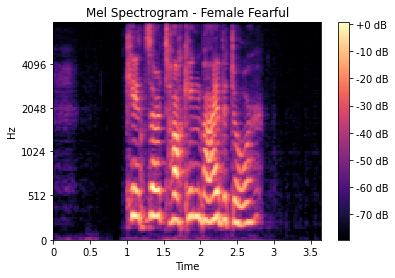

In [83]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.savefig('MelSpec_FemaleFearful.png')
plt.colorbar(format='%+2.0f dB');
#NIKITA SIROHI 19SCSE1180028 SHIVANK 19SCSE1180027

Male Disgust

In [84]:
# LOAD FILE
x, sr = librosa.load('/content/03-01-07-01-01-01-07.wav')

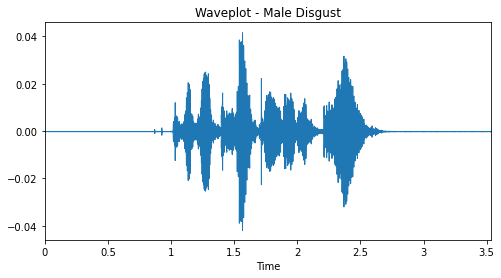

In [85]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')

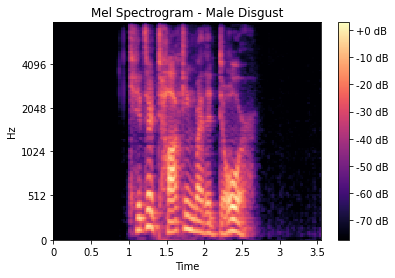

In [86]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Disgust')
plt.savefig('MelSpec_MaleDisgust.png')
plt.colorbar(format='%+2.0f dB');
#NIKITA SIROHI 19SCSE1180028 SHIVANK 19SCSE1180027

Female Surprised

In [87]:
# LOAD FILE
x, sr = librosa.load('/content/03-01-08-01-01-01-08.wav')

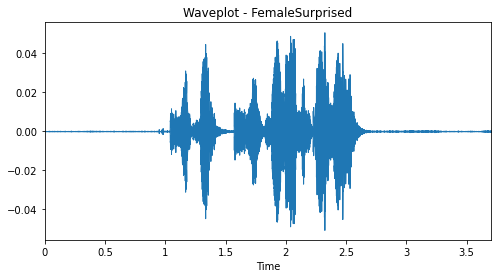

In [88]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')
plt.savefig('Waveplot_FemaleSurprised.png')

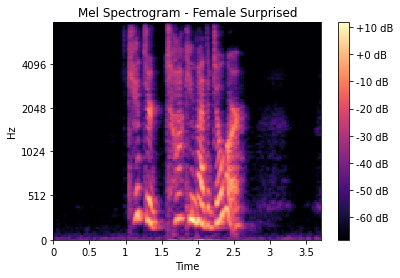

In [89]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.savefig('MelSpec_FemaleSurprised.png')
plt.colorbar(format='%+2.0f dB');
#NIKITA SIROHI 19SCSE1180028 SHIVANK 19SCSE1180027

In this project, we predict the eight emotion .In future we try to increase the effuciency of this project.
NIKITA SIROHI   19SCSE1180028
SHIVANK         19SCSE1180027